# Q2

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN 

# Hierarchical

In [2]:
airline=pd.read_csv("C:\\Users\\admin\\Downloads\\assing 7\\EastWestAirlines.csv")

In [3]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
airline.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
airline.shape

(3999, 12)

In [6]:
airline.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
airline1=normalize.fit_transform(airline.to_numpy())
airline2=pd.DataFrame(airline1,columns=airline.columns)
airline2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


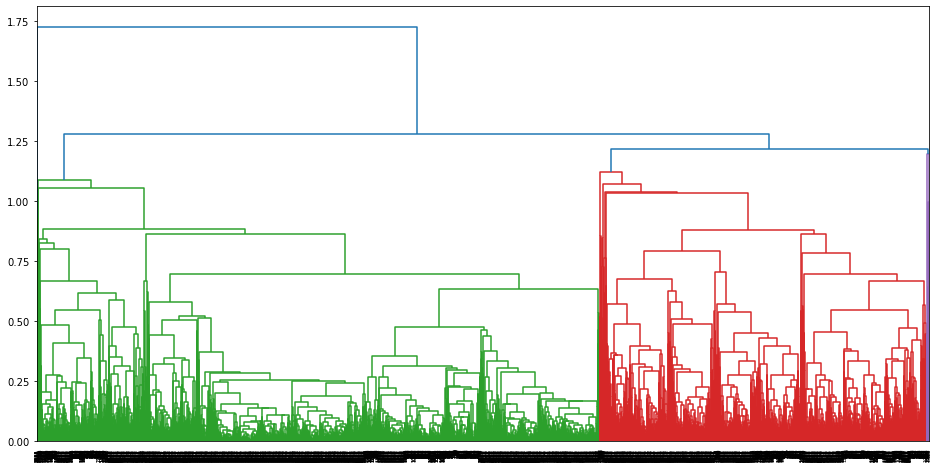

In [9]:
plt.figure(figsize=(16,8))
dendrogram=sch.dendrogram(sch.linkage(airline2,method='average'))

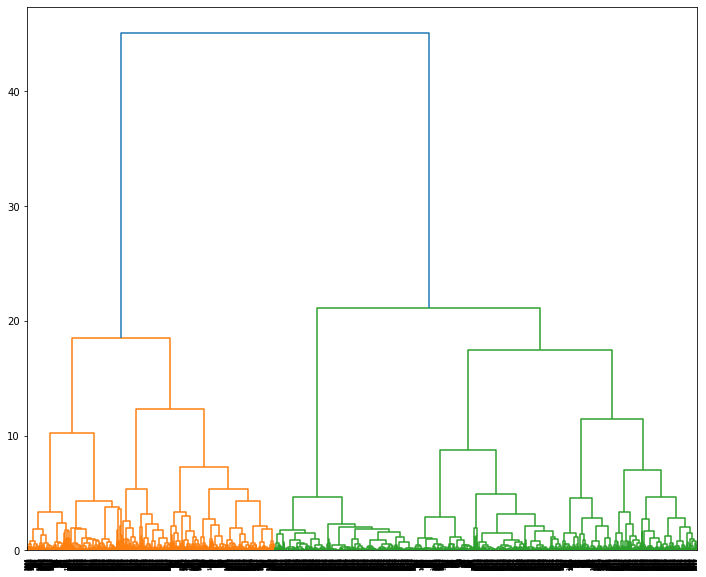

In [10]:
plt.figure(figsize=(12,10))
dendrogram=sch.dendrogram(sch.linkage(airline2,method='ward'))

In [11]:
HC=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [12]:
Y_HC=HC.fit_predict(airline)
clusters=pd.DataFrame(Y_HC,columns=['clusters'])

In [13]:
clusters

,clusters
0,2
1,2
2,2
3,2
4,2
...,...
3994,2
3995,2
3996,2
3997,2


In [14]:
airline2['h_clusterid']=clusters

In [15]:
airline2.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
383,0.096269,0.281545,0.000000,0.75,0.0,0.00,0.252256,0.302326,0.051919,0.113208,0.841331,0.0,0
1300,0.326368,0.432601,0.000000,0.50,0.0,0.75,0.166839,0.465116,0.069767,0.132075,0.606221,0.0,0
629,0.158458,0.438741,0.000000,0.75,0.0,0.00,0.099046,0.174419,0.001622,0.018868,0.774656,1.0,0
2656,0.665423,0.378265,0.233226,0.00,0.0,0.00,0.054421,0.325581,0.352078,0.490566,0.302508,1.0,0
117,0.029602,0.568710,0.000000,0.00,0.0,0.00,0.009481,0.034884,0.032450,0.037736,0.930311,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0.340547,0.032768,0.000000,0.00,0.0,0.00,0.013998,0.069767,0.016225,0.018868,0.632867,1.0,2
1358,0.340796,0.014013,0.000000,0.75,0.0,0.00,0.134911,0.220930,0.000000,0.000000,0.606342,1.0,2
1346,0.337811,0.003121,0.000000,0.00,0.0,0.00,0.008628,0.104651,0.000000,0.000000,0.612732,0.0,2
3998,1.000000,0.001769,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.168314,0.0,2


In [16]:
airline2['h_clusterid']=clusters
airline2.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
383,0.096269,0.281545,0.000000,0.75,0.0,0.00,0.252256,0.302326,0.051919,0.113208,0.841331,0.0,0
1300,0.326368,0.432601,0.000000,0.50,0.0,0.75,0.166839,0.465116,0.069767,0.132075,0.606221,0.0,0
629,0.158458,0.438741,0.000000,0.75,0.0,0.00,0.099046,0.174419,0.001622,0.018868,0.774656,1.0,0
2656,0.665423,0.378265,0.233226,0.00,0.0,0.00,0.054421,0.325581,0.352078,0.490566,0.302508,1.0,0
117,0.029602,0.568710,0.000000,0.00,0.0,0.00,0.009481,0.034884,0.032450,0.037736,0.930311,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,0.340547,0.032768,0.000000,0.00,0.0,0.00,0.013998,0.069767,0.016225,0.018868,0.632867,1.0,2
1358,0.340796,0.014013,0.000000,0.75,0.0,0.00,0.134911,0.220930,0.000000,0.000000,0.606342,1.0,2
1346,0.337811,0.003121,0.000000,0.00,0.0,0.00,0.008628,0.104651,0.000000,0.000000,0.612732,0.0,2
3998,1.000000,0.001769,0.000000,0.00,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.168314,0.0,2


# Kmeans

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
airline3=scaler.fit_transform(airline2)
airline3

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
         1.39545434e+00, -7.66919299e-01,  9.36285698e-02],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
         1.37995704e+00, -7.66919299e-01,  9.36285698e-02],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
         1.41192021e+00, -7.66919299e-01,  9.36285698e-02],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -1.31560393e+00,  1.30391816e+00,  9.36285698e-02],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  9.36285698e-02],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  9.36285698e-02]])

In [18]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(airline3)

KMeans(n_clusters=5, random_state=0)

In [19]:
kmeans.inertia_

29593.491366357568

In [20]:
wcss=[]
for i in range (1,30):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airline3)
    wcss.append(kmeans.inertia_)
    wcss

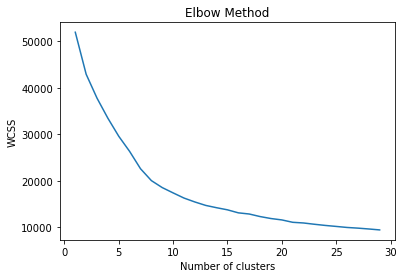

In [21]:
plt.plot(range(1,30),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
cluster_airline=KMeans(5,random_state=34)
cluster_airline.fit(airline3)

KMeans(n_clusters=5, random_state=34)

In [23]:
cluster_airline.labels_

array([4, 4, 4, ..., 2, 2, 2])

In [24]:
airline4=pd.DataFrame(cluster_airline.labels_,columns=['cluster'])
airline4

,cluster
0,4
1,4
2,4
3,4
4,0
...,...
3994,2
3995,2
3996,2
3997,2


In [25]:
airline5=pd.concat([airline,airline4],axis=1)
airline5

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


# DBSCAN

In [26]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
array=airline.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [28]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)
X

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [29]:
min_samples=4
dbscan=DBSCAN(eps=0.6, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=4)

In [30]:
dbscan.labels_

array([0, 0, 0, ..., 5, 0, 0], dtype=int64)

In [31]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,5
3997,0


In [32]:
cl.count()

cluster    3999
dtype: int64

In [33]:
clustered=pd.concat([airline,cl],axis=1)
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [34]:
clustered[clustered['cluster']==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,-1
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,3984,131125,862,1,1,1,4993,11,50,1,1443,0,-1
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0,-1
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,-1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,-1


In [35]:
clustered

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [36]:
clustered.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
cluster                  1.833458
dtype: float64

In [37]:
clustered.sort_values('cluster')

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
1248,1261,81291,0,2,1,1,10522,14,1430,1,5154,0,-1
1247,1260,49288,0,3,1,1,12538,19,600,2,5353,1,-1
3021,3043,20537,0,3,1,1,44791,21,2612,4,1569,1,-1
1245,1258,95207,0,3,1,1,30652,30,2348,8,5531,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,27
3619,3642,46207,0,3,1,1,16093,32,0,0,1130,0,27
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,27
3601,3624,74093,0,3,1,1,20055,37,0,0,949,0,27


In [38]:
X.shape

(3999, 12)

In [39]:
min_samples

4